# Travaux Pratiques 

---------
# Recovering Secret Exponent in RSA (Modular Exponentiation Analysis) 

## WITH Advanced (Differential) Side Channel Analysis
---------

To provide efficient RSA operation in hardware chip manufacturers usually embed arithmetic coprocessors to compute efficient modular multiplications x × y mod n for long integers x, y and n.

See slide ``Modular Arithmetic Methods``from the lesson slides.


Many techniques exist: interleaved multiplication- reduction with Knuth, Barrett, Montgomery, Sedlack or Quisquater methods [Dhe98].


<img src='images/Mod_expo_methods.png' style='width: 900px; float:center'>


<img src='images/Mod_mult_methods.png' style='width: 700px; float:center'>



Montgomery introduced in [Mon85] an efficient algorithm named Montgomery Modular Multiplication. 


<img src='images/MontMul.png' style='width: 700px; float:center'>


Modular exponentiation is the most time-consuming operation of RSA primitives. It is then essential to use an efficient method for exponentiation. Alg. 2.3. below, based on MontMul, gives the Montgomery exponentiation algorithm and is particularly suited for embedded RSA implementations.

<img src='images/MontModExp.png' style='width: 700px; float:center'>


**References**


[Dhe98] Dhem, J.-F.: Design of an efficient public-key cryptographic library for RISC-based smart cards. PhD thesis, Université catholique de Louvain, Louvain (1998)

[KAK96] Koc, C ̧ K., Acar, T., Kaliski, B.-S.: Analysing and comparing Montgomery multiplication algorithms. IEEE Micro 16(3), 26–33 (1996)

[Mon85] Montgomery, P.L.: Modular multiplication without trial division. Mathematics of Computation 44(170), 519–521 (1985)

---------


In [1]:
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
import estraces
import scared
import numpy as np

In [3]:
ths = estraces.read_ths_from_ets_file('../SideSCA-Traces-Public/RSA_SaM_traces.ets')
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../SideSCA-Traces-Public/RSA_SaM_traces.ets with 100 traces.
exponent.........: uint8
plaintext........: uint8



In [4]:
vhex = np.vectorize(hex)

In [5]:
# some parameters
modulus_bit_length = 1024
n_mod = 0xB828D7D0131A42A9FF63041DB16306639646E436367526638355881B831E7FAF33AE61EF6FC6E8961F4D6988A7F7A95FE9AC065E9A0C39595867DFE2ABFF9FA2C7876422AD5A40DEE4443EA7E019C32C9F6E172870CD7CA675AE705CA9148221506DA849DDA38A1B5701DDC554297F457A25A9FE5FAC2008B5D2FCA1C5BC281F
e_pub = 3

In [6]:
ths.plaintext

array([[ 70, 182, 164, ...,   6, 125, 164],
       [214,  62,  54, ..., 153, 170,  30],
       [128, 103, 236, ..., 109, 143, 107],
       ...,
       [168,  31, 183, ...,  91, 119, 222],
       [248, 207, 147, ..., 167, 105,  93],
       [125, 255, 254, ..., 234, 201, 231]], dtype=uint8)

Print the plaintext values in hexadecimal representation

In [7]:
print(vhex(ths[0].plaintext))

['0x46' '0xb6' '0xa4' '0x36' '0xb5' '0x64' '0xba' '0xbb' '0xa8' '0x45'
 '0x4' '0x56' '0x27' '0x99' '0xd8' '0x65' '0x30' '0x93' '0x1d' '0x3' '0x7'
 '0x9' '0x70' '0x2d' '0x2f' '0xbd' '0x24' '0xeb' '0x26' '0xae' '0x78'
 '0xc' '0xe5' '0xab' '0x8d' '0x1e' '0x17' '0xd' '0xd0' '0x36' '0xfb'
 '0x1f' '0x15' '0x5' '0xa7' '0x7d' '0xc2' '0x1e' '0xee' '0x1a' '0x2a'
 '0xbe' '0x1d' '0x32' '0x20' '0xda' '0x3a' '0xc7' '0xfc' '0x5' '0x1e'
 '0xa4' '0x5b' '0x4e' '0x91' '0xbe' '0xb6' '0xdc' '0x5a' '0x5a' '0x40'
 '0xb1' '0x9e' '0xd7' '0x50' '0xe' '0x27' '0x75' '0x90' '0x1' '0xe4'
 '0x1e' '0xe' '0x77' '0xae' '0xfa' '0x56' '0xcb' '0xe1' '0x40' '0x83'
 '0x1c' '0xbf' '0x45' '0x19' '0x80' '0x1d' '0x42' '0x6' '0xdd' '0xbd'
 '0x46' '0x98' '0xfe' '0x8c' '0xa7' '0x6b' '0x95' '0x7' '0x7d' '0x10'
 '0xee' '0xf1' '0x22' '0xbd' '0x29' '0x33' '0xfa' '0xf5' '0x96' '0x29'
 '0x3e' '0x9b' '0xdb' '0xa3' '0x6' '0x7d' '0xa4']


How to get the plaintext integer value from bytes with simple operation

In [8]:
plaintext_value = int.from_bytes(ths.plaintext[0], byteorder='big')
hex(plaintext_value)

'0x46b6a436b564babba84504562799d86530931d030709702d2fbd24eb26ae780ce5ab8d1e170dd036fb1f1505a77dc21eee1a2abe1d3220da3ac7fc051ea45b4e91beb6dc5a5a40b19ed7500e27759001e41e0e77aefa56cbe140831cbf4519801d4206ddbd4698fe8ca76b95077d10eef122bd2933faf596293e9bdba3067da4'

What is the exponent value in ths ?

In [9]:
exponent_value = int.from_bytes(ths.exponent[0], byteorder='big')
hex(exponent_value)

'0x7ac5e535621181c6aa4202be76420442642f42cecef8c442578e5abd0214551f77c9969f9fd9f06414de465b1aa51b954672aee9bc08263b90453fec72aa6a6b62aba003c038d7c78e50e5b4365d370d70a2a20b8cd5e1eed832e7cfa6fa7b5670ce0edc440bf8f650354af0216923efe2dac999b719b75e8b52eb1cf64ccd5b'

---------
---------

<img src='images/DoIt.png' style='width: 100px'>

## The traces below contain the beginning of an RSA exponentiation for the first bytes of exponent. 

## ---> How to recover the secret exponent bytes from traces?

---------
---------

In [12]:
print("Length of each exponentiation trace is " + str(len(ths[0].samples))+" points")

Length of each exponentiation trace is 250000 points


### 🫵 Your turn: plot the trace

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['figure.figsize']=(18,6)

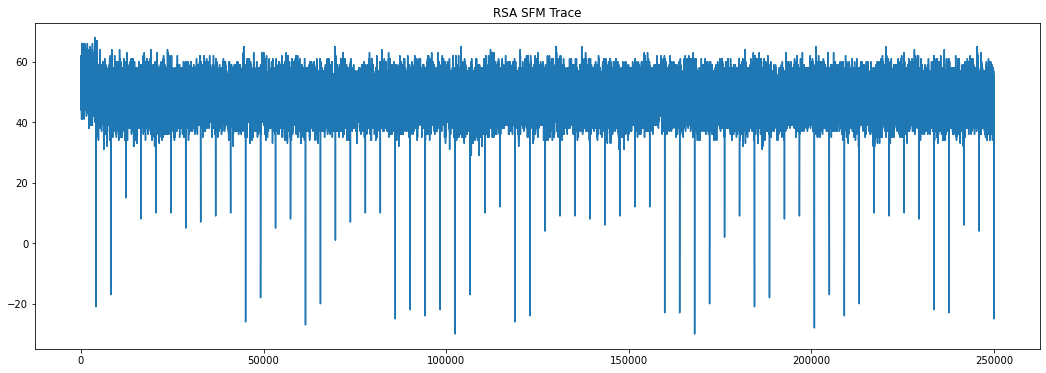

In [15]:
plt.plot(ths[0].samples)
plt.title('RSA SFM Trace')
plt.show()

### 🫵 Your turn:can you recover the secret exponent with SPA ?

### 🫵 Your turn: what can you test to identify where the multiplication operations are ?

-----

<img src='images/DoIt.png' style='width: 100px'>

## Using Reverse Side-Channel Analysis on which known metadata?

#### What is the value manipulated during a multiplication?

#### What about reverse analysis on plaintext ?


In [16]:
@scared.reverse_selection_function
def identity_plaintext(plaintext):
    return plaintext

In [17]:
container = scared.Container(ths)

nb_words parameters is used to define the base for representation of the value used for correlation.

* nb_words = 1 means the representation of the value used for model is in 1 byte representation --> 8-bit base representation for the value
* nb_words = 2 means the representation of the value used for model is in 2 byte representation --> 16-bit base representation for the value
* nb_words = 4 means the representation of the value used for model is in 4 byte representation --> 32-bit base representation for the value

In [18]:
reverse_plaintext = scared.CPAReverse(selection_function=identity_plaintext, model = scared.HammingWeight(nb_words=1))
reverse_plaintext.run(container)

In [19]:
reverse_plaintext.results.shape

(128, 250000)

In [ ]:
print(str(modulus_bit_length//8)+" bytes")

### Plot results

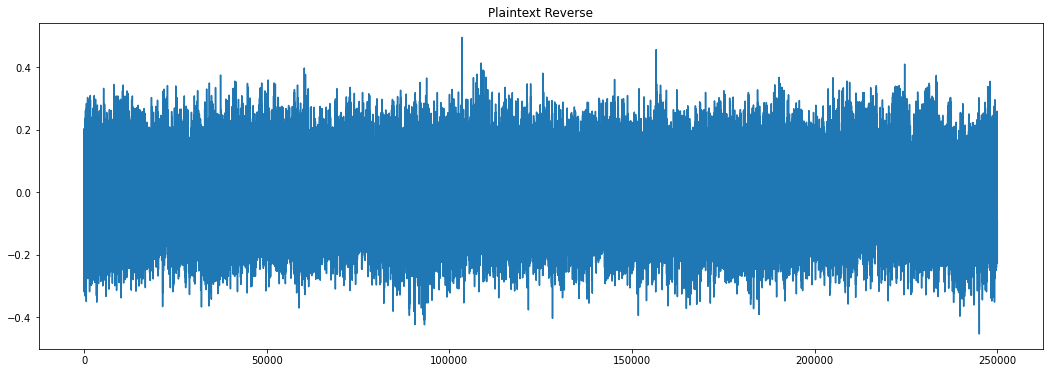

In [21]:
plt.plot(reverse_plaintext.results[0].T)
plt.title('Plaintext Reverse')
plt.show()

#### Do we have exploitable information in reverse correlation traces ?

A hardware multiplier $a \times b$ to be efficient manipulates values in $b$ base.
Bigger is $b$: $2^^{16}, 2^^{32}, 2^^{64}$, faster is the multiplication.

Therefore to improve correlation we have to correlate with plaintext values in exact $b$ base representation.

* If $b = 2^^{8}$ then use plaintext in 8-bit decomposition: bytes
* If $b = 2^^{16}$ then use plaintext in 16-bit words decomposition: 2-bytes
* If $b = 2^^{32}$ then use plaintext in 32-bit words decomposition: 4-bytes

Let's try the reverse with other base $b$

In [22]:
reverse_plaintext = scared.CPAReverse(selection_function=identity_plaintext, model = scared.HammingWeight(nb_words=2))
reverse_plaintext.run(container)

In [23]:
reverse_plaintext.results.shape

(64, 250000)

In [24]:
print(str(modulus_bit_length//16)+" 16-bit words")

64 16-bit words


### Plot results

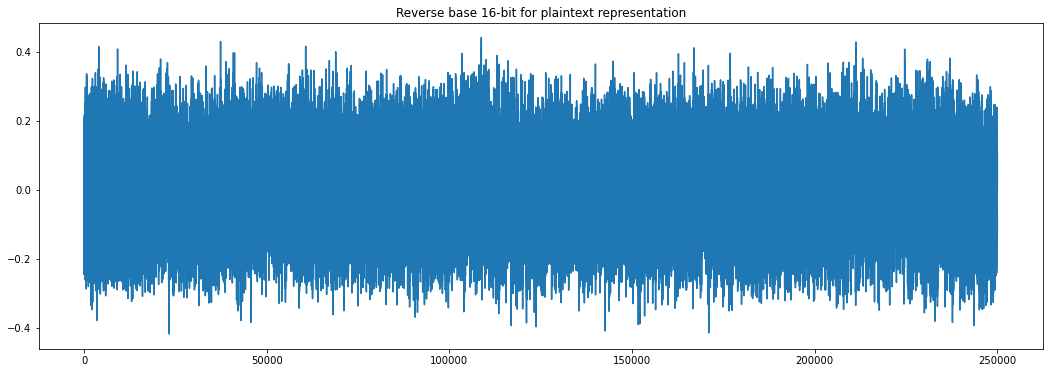

In [25]:
plt.plot(reverse_plaintext.results[0].T)
plt.title('Reverse base 16-bit for plaintext representation')
plt.show()

In [26]:
reverse_plaintext = scared.CPAReverse(selection_function=identity_plaintext, model = scared.HammingWeight(nb_words=4))
reverse_plaintext.run(container)

In [27]:
reverse_plaintext.results.shape

(32, 250000)

In [28]:
print(str(modulus_bit_length//32)+" 32-bit words")

32 32-bit words


### Plot results

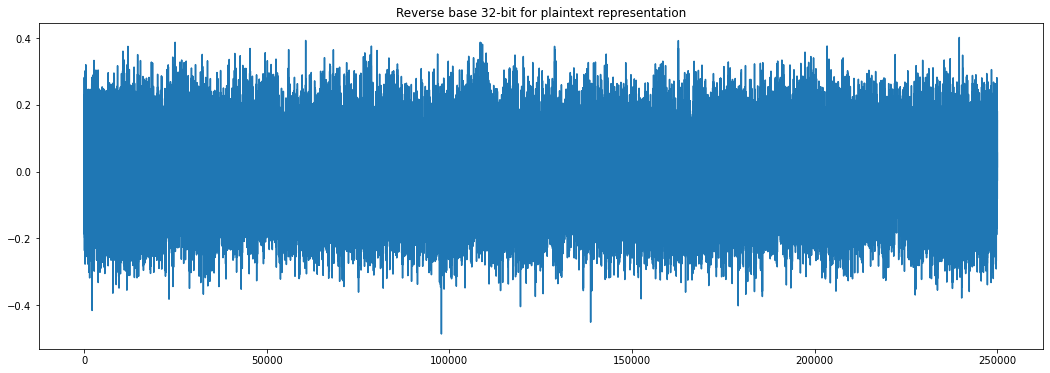

In [29]:
plt.plot(reverse_plaintext.results[0].T)
plt.title('Reverse base 32-bit for plaintext representation')
plt.show()

#### We know the plaintext is not randomized ? 

### So why do we have no correlation with the traces ?

-------------

#### If the modular mutiplication is Montgomery modular multiplication, then what is the value manipulated during modular multiplications ? Is is $a \times m$ or ?

### THEN test the reverse analysis with the plaintext in Montgomery representation as it should be manipulated by the hardware multiplier:  $a \times r \times m \bmod n$

Remember:

<img src='images/MontModExp.png' style='width: 700px; float:center'>


In [30]:
r = pow(2, modulus_bit_length, n_mod)
hex(r)

'0x47d7282fece5bd56009cfbe24e9cf99c69b91bc9c98ad99c7caa77e47ce18050cc519e1090391769e0b29677580856a01653f9a165f3c6a6a798201d5400605d38789bdd52a5bf211bbbc1581fe63cd36091e8d78f3283598a518fa356eb7ddeaf9257b6225c75e4a8fe223aabd680ba85da5601a053dff74a2d035e3a43d7e1'

----------
### So we perform the reverse analysis with $plaintext \times r \bmod n$ instead of plaintext value.

In [31]:
def identity_plaintext_Montgomery(plaintext, n, bitlen):
    montgomery_cst = pow(2, bitlen, n)
    modulus_base_len = (bitlen) // 8
    sign_array = np.zeros((len(plaintext), modulus_base_len), dtype=np.uint8)
 
    for j in range(0, len(plaintext)):
        long_int_value = int.from_bytes(plaintext[j], byteorder='big')
        signature_intermediate = (long_int_value*montgomery_cst % n)
        sign_int_byte_array = signature_intermediate.to_bytes(modulus_base_len, byteorder='little')
        for i in range(0, modulus_base_len): 
            sign_array[j][i] = sign_int_byte_array[i]
    return sign_array

In [32]:
@scared.reverse_selection_function
def identity_plaintext_Montgomery_representation(plaintext):
    return identity_plaintext_Montgomery(plaintext, n_mod, modulus_bit_length)

In [33]:
reverse_plaintext = scared.CPAReverse(selection_function=identity_plaintext_Montgomery_representation, model = scared.HammingWeight())
reverse_plaintext.run(container)

In [34]:
reverse_plaintext.results.shape

(128, 250000)

### Plot results

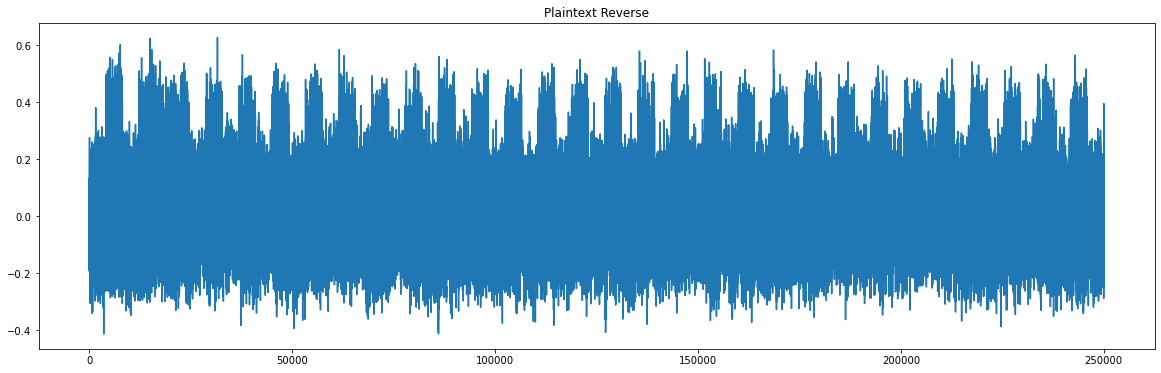

In [35]:
plt.rcParams['figure.figsize']=(20,6)
plt.plot(reverse_plaintext.results[31].T)
plt.title('Plaintext Reverse')
plt.show()

#### TRY it with 16-bit base

In [36]:
reverse_plaintext = scared.CPAReverse(selection_function=identity_plaintext_Montgomery_representation, model = scared.HammingWeight(nb_words=2))
reverse_plaintext.run(container)

In [37]:
reverse_plaintext.results.shape

(64, 250000)

### Plot results

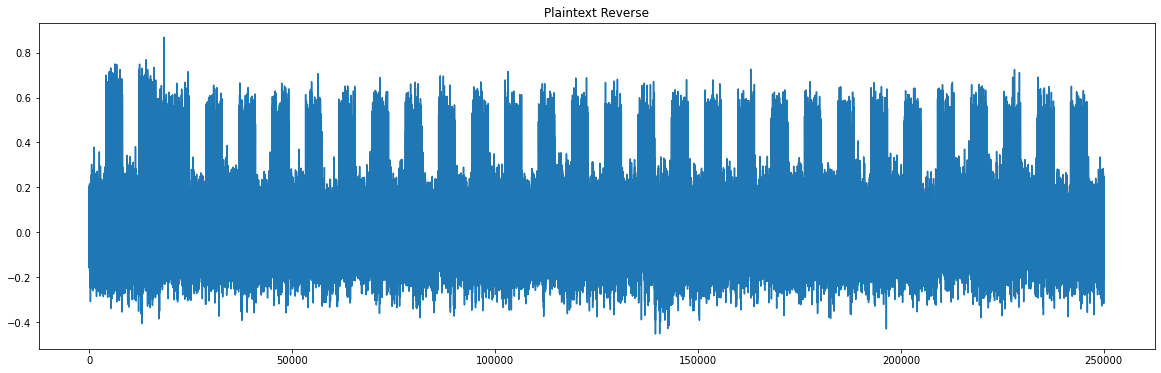

In [38]:
plt.rcParams['figure.figsize']=(20,6)
plt.plot(reverse_plaintext.results[31].T)
plt.title('Plaintext Reverse')
plt.show()

#### TRY it with 32-bit base

In [39]:
reverse_plaintext = scared.CPAReverse(selection_function=identity_plaintext_Montgomery_representation, model = scared.HammingWeight(nb_words=4))
reverse_plaintext.run(container)

In [40]:
reverse_plaintext.results.shape

(32, 250000)

### Plot results

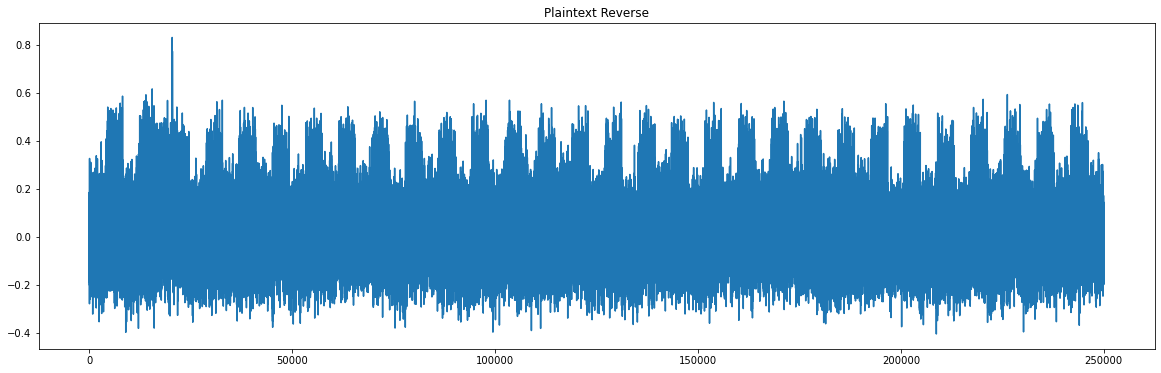

In [41]:
plt.rcParams['figure.figsize']=(20,6)
plt.plot(reverse_plaintext.results[31].T)
plt.title('Plaintext Reverse')
plt.show()

### --> CORRECT base used is 16-bit as we see higher correlation.

------------------

### 🫵 Your turn: can you recover with SPA on this correlation trace the secret exponent ?

#### --> No this is not possible, it is not possible to see consecutive squares or to distinguish 0-bit (squaring) from 1-bit (squaring then multiply) operations.

-------------------

### 🫵 Your turn: If not then looking at the trace, what do you conclude on the algorithm used to perform the modular exponentiation?

#### --> The exponentiation is computed using a regular algorithm, i.e. square and multiply always algorithm.

#### Indeed we observe the exponentiation is regular: multiplications by M.R are always performed after a squaring operation.

-----

## NO ATTACK SUCCESS YET HERE !!! :-(


-----

<img src='images/DoIt.png' style='width: 100px'>

## How can we recover the secret exponent using correlation analysis ?
## What would be "DPA" like attack to do that ?

--------

### WE modify our function to reverse the value $m^{guess} \bmod n$

In [42]:
def m_pow_guess_value_Mont(plaintext, n, bitlen, exponent_guess):
    montgomery_cst = pow(2, bitlen, n)
    modulus_base_len = (bitlen) // 8
    sign_array = np.zeros((len(plaintext), modulus_base_len), dtype=np.uint8)
 
    for j in range(0, len(plaintext)):
        long_int_value = int.from_bytes(plaintext[j], byteorder='big')
        signature_intermediate = (pow(long_int_value, exponent_guess, n))*montgomery_cst % n    
        sign_int_byte_array = signature_intermediate.to_bytes(modulus_base_len, byteorder='little')
        for i in range(0, modulus_base_len): 
            sign_array[j][i] = sign_int_byte_array[i]
    return sign_array

In [43]:
guess = 0x03

In [44]:
@scared.reverse_selection_function
def m_pow_guess_value_Mgt(plaintext):
    return m_pow_guess_value_Mont(plaintext, n_mod, modulus_bit_length, guess)

In [45]:
reverse_expo_guess = scared.CPAReverse(selection_function=m_pow_guess_value_Mgt, model = scared.HammingWeight(nb_words=2))
reverse_expo_guess.run(container)

In [46]:
reverse_expo_guess.results.shape

(64, 250000)

### Plot results

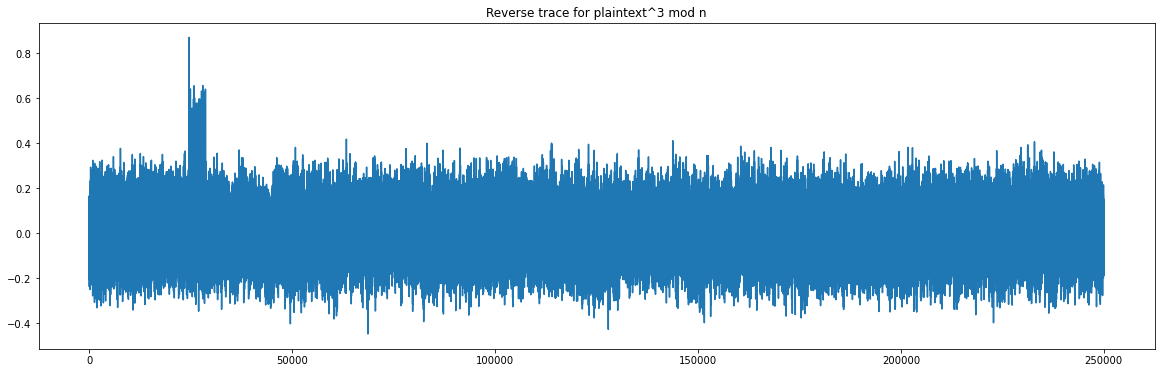

In [47]:
plt.plot(reverse_expo_guess.results[0].T)
plt.title('Reverse trace for plaintext^'+str(guess)+' mod n')
plt.show()

We have recovered The two first bits of the secret exponent.

d = 0b11... = 0x03

Let's continue: next exponent bit is either 1 or 0:

* d= 0b110 and $plaintext^6 \bmod n$ is computed
* d= 0b111 and $plaintext^7 \bmod n$ is computed

In [48]:
guess = 0b110

In [49]:
@scared.reverse_selection_function
def m_pow_guess_value_Mgt(plaintext):
    return m_pow_guess_value_Mont(plaintext, n_mod, modulus_bit_length, guess)

In [50]:
reverse_expo_guess = scared.CPAReverse(selection_function=m_pow_guess_value_Mgt, model = scared.HammingWeight(nb_words=2))
reverse_expo_guess.run(container)

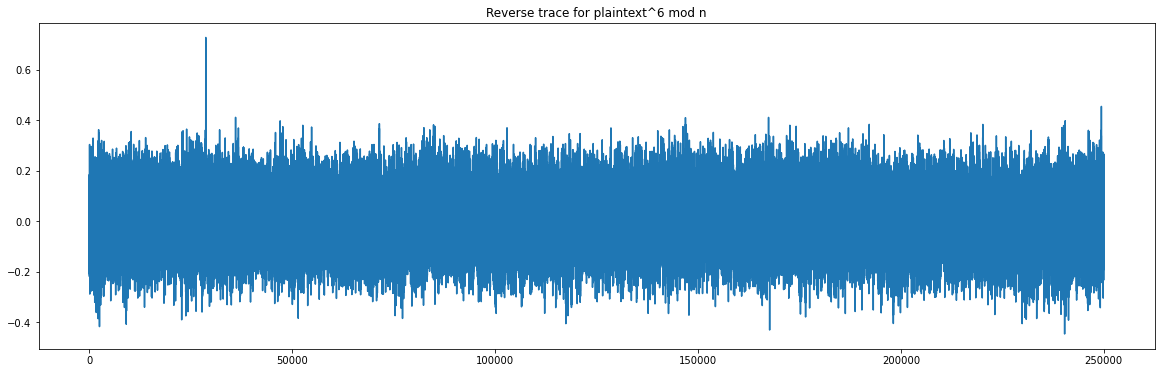

In [51]:
plt.plot(reverse_expo_guess.results[0].T)
plt.title('Reverse trace for plaintext^'+str(guess)+' mod n')
plt.show()

In [52]:
guess = 0b111

In [53]:
@scared.reverse_selection_function
def m_pow_guess_value_Mgt(plaintext):
    return m_pow_guess_value_Mont(plaintext, n_mod, modulus_bit_length, guess)

In [54]:
reverse_expo_guess = scared.CPAReverse(selection_function=m_pow_guess_value_Mgt, model = scared.HammingWeight(nb_words=2))
reverse_expo_guess.run(container)

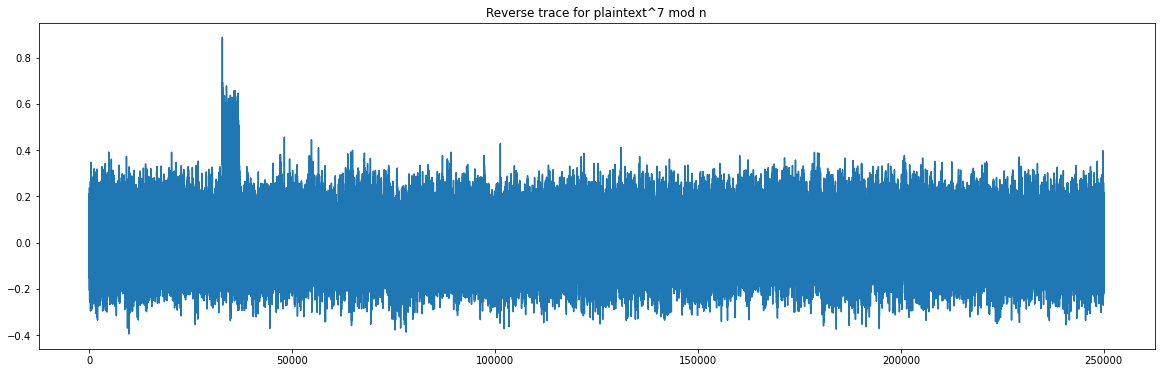

In [55]:
plt.plot(reverse_expo_guess.results[0].T)
plt.title('Reverse trace for plaintext^'+str(guess)+' mod n')
plt.show()

#### Secret exponent known is now: 0b111...

#### let's continue with fourth bit of secret exponent ...

In [56]:
guess = 0b1110

In [57]:
@scared.reverse_selection_function
def m_pow_guess_value_Mgt(plaintext):
    return m_pow_guess_value_Mont(plaintext, n_mod, modulus_bit_length, guess)

In [58]:
reverse_expo_guess = scared.CPAReverse(selection_function=m_pow_guess_value_Mgt, model = scared.HammingWeight(nb_words=2))
reverse_expo_guess.run(container)

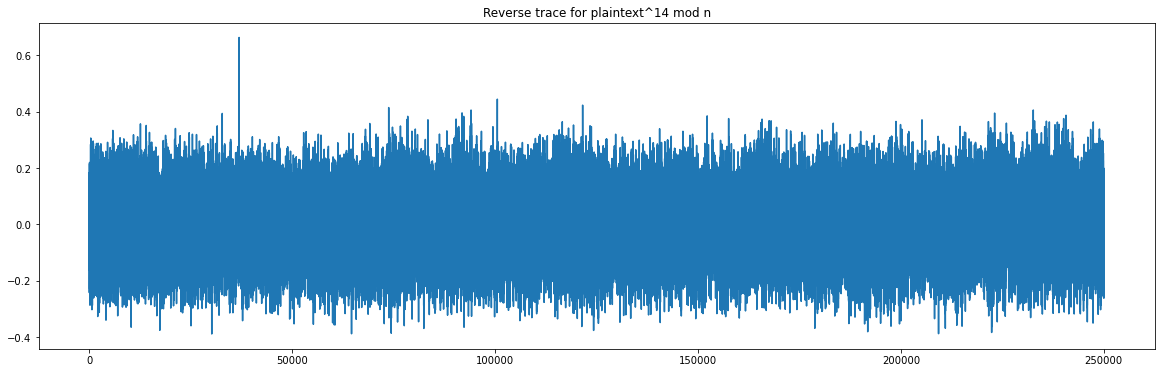

In [59]:
plt.plot(reverse_expo_guess.results[0].T)
plt.title('Reverse trace for plaintext^'+str(guess)+' mod n')
plt.show()

In [60]:
guess = 0b1111

In [61]:
@scared.reverse_selection_function
def m_pow_guess_value_Mgt(plaintext):
    return m_pow_guess_value_Mont(plaintext, n_mod, modulus_bit_length, guess)

In [62]:
reverse_expo_guess = scared.CPAReverse(selection_function=m_pow_guess_value_Mgt, model = scared.HammingWeight(nb_words=2))
reverse_expo_guess.run(container)

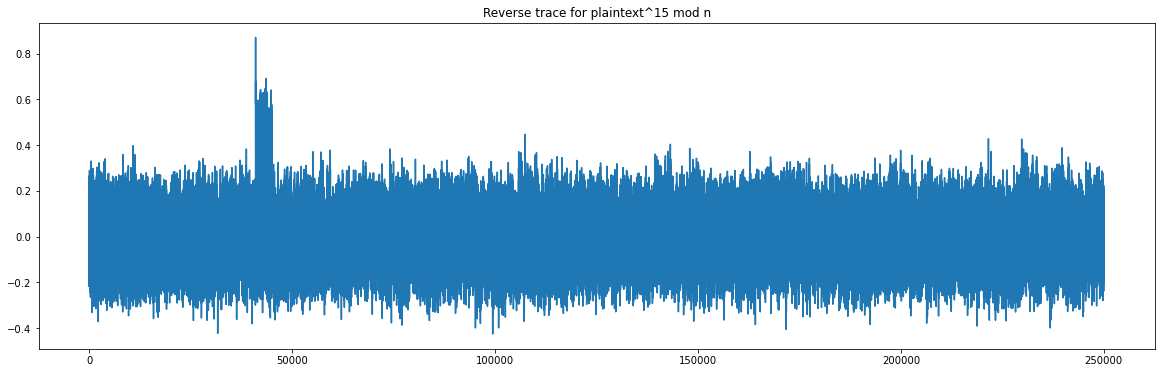

In [63]:
plt.plot(reverse_expo_guess.results[0].T)
plt.title('Reverse trace for plaintext^'+str(guess)+' mod n')
plt.show()

In [64]:
bin(0x7A)

'0b1111010'

### Then let's continue bit per bit .. or 2-bit per 2-bit (4 guesses) ... or nibble per nibble (16 guesses) ... or byte per byte (256 guesses) .... etc

In [65]:
@scared.reverse_selection_function
def m_pow_guess_value_Mgt(plaintext):
    return m_pow_guess_value_Mont(plaintext, n_mod, modulus_bit_length, 0x7AC5E5)

In [66]:
reverse_expo_guess = scared.CPAReverse(selection_function=m_pow_guess_value_Mgt, model = scared.HammingWeight(nb_words=2))
reverse_expo_guess.run(container)

In [67]:
reverse_expo_guess.results.shape

(64, 250000)

### Plot results

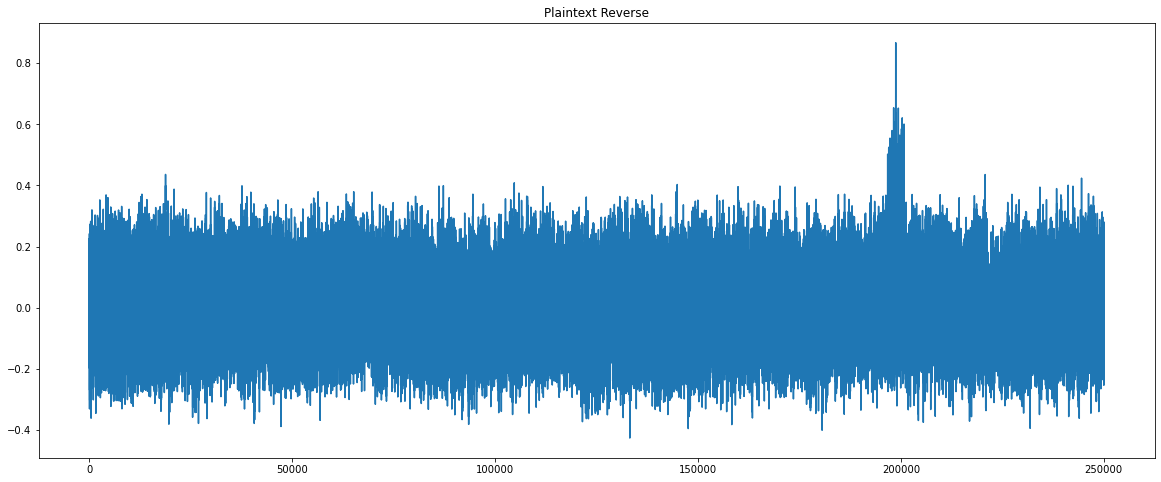

In [68]:
%matplotlib inline

plt.rcParams['figure.figsize']=(20,8)
plt.plot(reverse_expo_guess.results[31].T)
plt.title('Plaintext Reverse')
plt.show()

# Conclusion

* Attacking modular integer operations it is important to identify the proper modular arithmetic used for operations

* Regular algorithm like Square & Multiply algorithms (or Ladder) can be defeated with DPA like analysis

* Blinding on message and/or exponent is required to counterfeit such attacks

* Be aware more complex attack like horizontal attacks exist to apply such DPA on single trace attacks